In [1]:
from keras.datasets import reuters

In [2]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [5]:
def vectorize(sequences, dimension=10000):
  result=np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    result[i,sequence]=1
  return result

In [7]:
import numpy as np

for labels, can either use the similar vectorize method or use to_categorical



In [10]:
#extra optoin
#dimension=number of classes(here it is 46)
def one_hot_ref(sequences, dimension=np.amax(train_labels)):
  result=np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    result[i,sequence]=1
  return result

In [13]:
import numpy as np

In [14]:
#option 2
def to_one_hot(labels, dimension=46):
  result_labels=np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    #print('this is the number %d'% i)
    #print(label)
    result_labels[i,label]=1
  return result_labels

In [15]:
from keras.utils import to_categorical

In [16]:
train_i=vectorize(train_data)
test_i=vectorize(test_data)
train_i_labels=to_categorical(train_labels)
test_i_labels=to_categorical(test_labels)

In [17]:
from keras import models

In [18]:
model=models.Sequential()

In [19]:
from keras import layers

In [20]:
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))

In [21]:
model.add(layers.Dense(64,activation='relu'))

In [24]:
model.add(layers.Dense(46,activation='softmax'))

In [25]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
train_val=train_i[:1000]
train_set=train_i[1000:]
train_labels_val=train_i_labels[:1000]
train_set_labels=train_i_labels[1000:]

In [27]:
history=model.fit(train_set, train_set_labels, epochs=20, batch_size=512,validation_data=(train_val,train_labels_val))

Epoch 1/20
16/16 [==============================] - 2s 60ms/step - loss: 3.2481 - accuracy: 0.4016 - val_loss: 1.7937 - val_accuracy: 0.6520
Epoch 2/20
16/16 [==============================] - 1s 42ms/step - loss: 1.5519 - accuracy: 0.6987 - val_loss: 1.3195 - val_accuracy: 0.7250
Epoch 3/20
16/16 [==============================] - 1s 43ms/step - loss: 1.0843 - accuracy: 0.7803 - val_loss: 1.1371 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 1s 44ms/step - loss: 0.8561 - accuracy: 0.8221 - val_loss: 1.0454 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.6695 - accuracy: 0.8616 - val_loss: 0.9790 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 0.5238 - accuracy: 0.8913 - val_loss: 0.9092 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 1s 45ms/step - loss: 0.4312 - accuracy: 0.9155 - val_loss: 0.9046 - val_accuracy: 0.8090
Epoch 8/20
16

In [28]:
history_dict=history.history

In [31]:
from matplotlib import pyplot as plt

In [38]:
epchs=range(1,len(history_dict['accuracy'])+1)

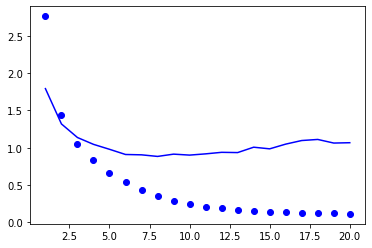

In [40]:
plt.plot(epchs,history_dict['loss'],'bo',label='training loss')
plt.plot(epchs,history_dict['val_loss'],'b',label='validation loss')
plt.show()

In [63]:
result_set=model.evaluate(test_i,test_i_labels)

71/71 [==============================] - 0s 2ms/step - loss: 1.2414 - accuracy: 0.7925


In [43]:
result_set

[1.2414014339447021, 0.7925200462341309]

The next part deals with a manual method for calculation instead of the evaluate method

In [44]:
predictions=model.predict(test_i)

In [52]:
from sklearn.metrics import classification_report

In [55]:
#funciton to convert the probabilites to categories(the one with the highest value gets a one(sum is 1 in each row))
def result_to_one_hot(preds):
  ret1=np.zeros((len(preds),len(preds[0])))
  for i,pred in enumerate(preds):
    ret1[i,np.argmax(pred)]=1
  return ret1


In [56]:
pred_func=result_to_one_hot(predictions)

In [58]:
test_i_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [61]:
classification_report(pred_func,test_i_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.75      0.90      0.82        10\n           1       0.80      0.70      0.75       120\n           2       0.50      0.77      0.61        13\n           3       0.94      0.89      0.91       866\n           4       0.85      0.85      0.85       476\n           5       0.20      0.50      0.29         2\n           6       0.86      0.92      0.89        13\n           7       0.33      1.00      0.50         1\n           8       0.68      0.72      0.70        36\n           9       0.80      0.83      0.82        24\n          10       0.80      0.96      0.87        25\n          11       0.77      0.53      0.63       121\n          12       0.15      0.50      0.24         4\n          13       0.57      0.55      0.56        38\n          14       0.50      1.00      0.67         1\n          15       0.11      0.50      0.18         2\n          16       0.78      0.61      0.68       127\n       

In [45]:
predictions

array([[2.5097361e-07, 1.3373324e-06, 7.4873308e-09, ..., 3.6908169e-08,
        1.1896118e-11, 2.8829396e-07],
       [3.6140926e-02, 1.0089618e-02, 6.3920284e-05, ..., 1.1212530e-08,
        3.5708592e-08, 1.0535433e-05],
       [1.9102257e-02, 8.8619882e-01, 1.2466837e-04, ..., 1.5303709e-05,
        7.2144358e-06, 2.4300864e-05],
       ...,
       [9.2708041e-07, 5.9811759e-06, 9.4996921e-07, ..., 5.9870911e-07,
        3.5463156e-08, 6.2448203e-07],
       [1.5145570e-02, 6.9499135e-02, 8.7176515e-03, ..., 4.6272879e-04,
        3.1514082e-05, 3.5285720e-04],
       [1.5906240e-04, 8.3873975e-01, 5.4801218e-05, ..., 2.6759849e-06,
        1.9086075e-07, 2.5189138e-06]], dtype=float32)

In [48]:
predictions[2]

array([1.9102257e-02, 8.8619882e-01, 1.2466837e-04, 1.6881389e-04,
       6.5551794e-05, 3.8094565e-04, 3.6197343e-05, 4.3657998e-05,
       7.3977589e-04, 7.7691127e-04, 3.3648306e-05, 5.0900795e-02,
       2.8093789e-05, 3.0036722e-03, 2.0067478e-03, 3.7692173e-03,
       8.4104054e-03, 1.6948777e-03, 5.2524544e-03, 1.0461639e-04,
       8.6448406e-04, 4.1398293e-04, 1.2929153e-03, 3.0745490e-05,
       2.3027693e-03, 1.7214941e-05, 6.2715291e-05, 7.7666971e-04,
       7.9715345e-03, 7.3166259e-05, 5.3836011e-06, 4.0884646e-05,
       4.3609561e-04, 5.6142941e-05, 9.2123286e-05, 8.0644422e-06,
       1.3725950e-03, 1.1761832e-04, 2.1091282e-05, 8.6819739e-07,
       5.6196051e-04, 4.6199083e-04, 1.3020726e-04, 1.5303709e-05,
       7.2144358e-06, 2.4300864e-05], dtype=float32)

In [49]:
np.argmax(predictions[2])

1

In [50]:
np.sum(predictions[2])

1.0000001

In [59]:
len(predictions)

2246

In [60]:
np.argmax(predictions[2245])

1